# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [105]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [173]:
sinasc_raw['GESTACAO']

0        37 a 41 semanas
1        37 a 41 semanas
2        37 a 41 semanas
3        37 a 41 semanas
4        37 a 41 semanas
              ...       
27023    32 a 36 semanas
27024    37 a 41 semanas
27025    37 a 41 semanas
27026    32 a 36 semanas
27027    37 a 41 semanas
Name: GESTACAO, Length: 27028, dtype: object

In [171]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc_raw.columns 'IDADEMAE' 'ESCMAE' 'QTDFILMORT'  'PESO' 'CONSULTAS '

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [17]:
sinasc1 = sinasc_raw[['munResLat','munResAlt','munResArea']].copy()
sinasc1.head(5)

,munResLat,munResAlt,munResArea
0,-11.93554,338.0,7067.025
1,-11.93554,338.0,7067.025
2,-11.93554,338.0,7067.025
3,-12.13178,397.0,3958.273
4,-11.93554,338.0,7067.025


In [18]:
Lat_faixa = pd.cut(sinasc1['munResLat'], [-13, -10.5, -8])
Lat_faixa

0        (-13.0, -10.5]
1        (-13.0, -10.5]
2        (-13.0, -10.5]
3        (-13.0, -10.5]
4        (-13.0, -10.5]
              ...      
27023    (-13.0, -10.5]
27024    (-13.0, -10.5]
27025    (-13.0, -10.5]
27026    (-13.0, -10.5]
27027    (-13.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-13.0, -10.5] < (-10.5, -8.0]]

In [19]:
sinasc1.pivot_table(values = ['munResAlt','munResArea'], index = Lat_faixa, aggfunc = ['sum', 'mean', 'min', 'max', 'median', 'std','var'])

sum                      mean                     min  \
                munResAlt    munResArea   munResAlt    munResArea munResAlt   
munResLat                                                                     
(-13.0, -10.5]  3132768.0  8.228553e+07  252.195138   6624.177094     133.0   
(-10.5, -8.0]   1530415.0  3.137711e+08  109.050520  22357.926110      85.0   

                                max               median             \
               munResArea munResAlt munResArea munResAlt munResArea   
munResLat                                                             
(-13.0, -10.5]    459.978     595.0  24855.724     191.0   5126.723   
(-10.5, -8.0]     965.676     192.0  34096.394      87.0  34096.394   

                       std                        var                
                 munResAlt    munResArea    munResAlt    munResArea  
munResLat                                                            
(-13.0, -10.5]  141.195394   5741.322951  19936.13936  3.296279e+07  
(-10.5, -8.0]    30.071422  14488.909375    904.29040  2.099285e+08

A media da área dos municípios que tem latitude acima de 10.5 é maior do que a média da área dos que estão localizados acima dessa latidude. Quando somamos a área desse território percebe-se que a maior concentração territorial está a uma latidude acima de 10.5.

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [38]:
sinasc2 = sinasc_raw[['munResArea','QTDPARTNOR','QTDPARTCES']].copy()
sinasc2.head(5)


,munResArea,QTDPARTNOR,QTDPARTCES
0,7067.025,0.0,0.0
1,7067.025,0.0,1.0
2,7067.025,1.0,1.0
3,3958.273,0.0,0.0
4,7067.025,0.0,1.0


In [21]:
sinasc2['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [24]:
area_faixa = pd.cut(sinasc2['munResArea'], [460, 3000, 35000])
area_faixa

0        (3000, 35000]
1        (3000, 35000]
2        (3000, 35000]
3        (3000, 35000]
4        (3000, 35000]
             ...      
27023    (3000, 35000]
27024    (3000, 35000]
27025    (3000, 35000]
27026    (3000, 35000]
27027      (460, 3000]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(460, 3000] < (3000, 35000]]

In [26]:
sinasc2.pivot_table(values = ['QTDPARTNOR','QTDPARTCES'], index = area_faixa, aggfunc = ['sum', 'mean', 'min', 'max', 'median', 'std','var'])

sum                  mean                   min  \
              QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES   
munResArea                                                             
(460, 3000]       2910.0     1898.0   0.571934   0.373255        0.0   
(3000, 35000]    10184.0    12659.0   0.507070   0.632982        0.0   

                                max                median             \
              QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
munResArea                                                             
(460, 3000]          0.0        5.0       10.0        0.0        0.0   
(3000, 35000]        0.0       12.0       41.0        0.0        0.0   

                     std                   var             
              QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR  
munResArea                                                 
(460, 3000]     0.748719   0.856498   0.560580   0.733588  
(3000, 35000]   0.744981   1.278932   0.554997   1.635668

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [30]:
sinasc3 = sinasc_raw[['munResAlt','QTDPARTNOR','QTDPARTCES']].copy()
sinasc3.head(5)

,munResAlt,QTDPARTNOR,QTDPARTCES
0,338.0,0.0,0.0
1,338.0,0.0,1.0
2,338.0,1.0,1.0
3,397.0,0.0,0.0
4,338.0,0.0,1.0


In [29]:
sinasc3['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [31]:
faixa_alt= pd.qcut(sinasc3['munResAlt'], 2)

In [32]:
sinasc3.pivot_table(values = ['QTDPARTNOR','QTDPARTCES'], index = faixa_alt, aggfunc = ['sum', 'mean', 'min', 'max', 'median', 'std','var'])

sum                  mean                   min  \
                QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES   
munResAlt                                                                
(84.999, 153.0]     5697.0     9307.0   0.475225   0.780527        0.0   
(153.0, 595.0]      7439.0     5264.0   0.561519   0.398064        0.0   

                                  max                median             \
                QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
munResAlt                                                                
(84.999, 153.0]        0.0       12.0       40.0        0.0        0.0   
(153.0, 595.0]         0.0       12.0       41.0        0.0        0.0   

                       std                   var             
                QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR  
munResAlt                                                    
(84.999, 153.0]   0.736925   1.362645   0.543058   1.856801  
(153.0, 595.0]    0.752433   1.018270   0.566156   1.036874

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [141]:
sinasc4 = sinasc_raw[['munResNome','DTNASC','IDADEMAE']].copy()
sinasc4.head()

,munResNome,DTNASC,IDADEMAE
0,Alta Floresta D'Oeste,2019-02-19,19
1,Alta Floresta D'Oeste,2019-02-21,29
2,Alta Floresta D'Oeste,2019-02-25,37
3,Alto Alegre dos Parecis,2019-03-20,30
4,Alta Floresta D'Oeste,2019-03-23,30


In [142]:
sinasc4['imediatas'] = sinasc4['munResNome'].map({
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
})

In [143]:
sinasc4

,munResNome,DTNASC,IDADEMAE,imediatas
0,Alta Floresta D'Oeste,2019-02-19,19,Cacoal
1,Alta Floresta D'Oeste,2019-02-21,29,Cacoal
2,Alta Floresta D'Oeste,2019-02-25,37,Cacoal
3,Alto Alegre dos Parecis,2019-03-20,30,Cacoal
4,Alta Floresta D'Oeste,2019-03-23,30,Cacoal
...,...,...,...,...
27023,Vilhena,2019-12-13,32,Vilhena
27024,Chupinguaia,2019-10-04,19,Vilhena
27025,Vilhena,2019-08-02,24,Vilhena
27026,Vilhena,2019-12-23,21,Vilhena


<AxesSubplot:xlabel='DTNASC'>

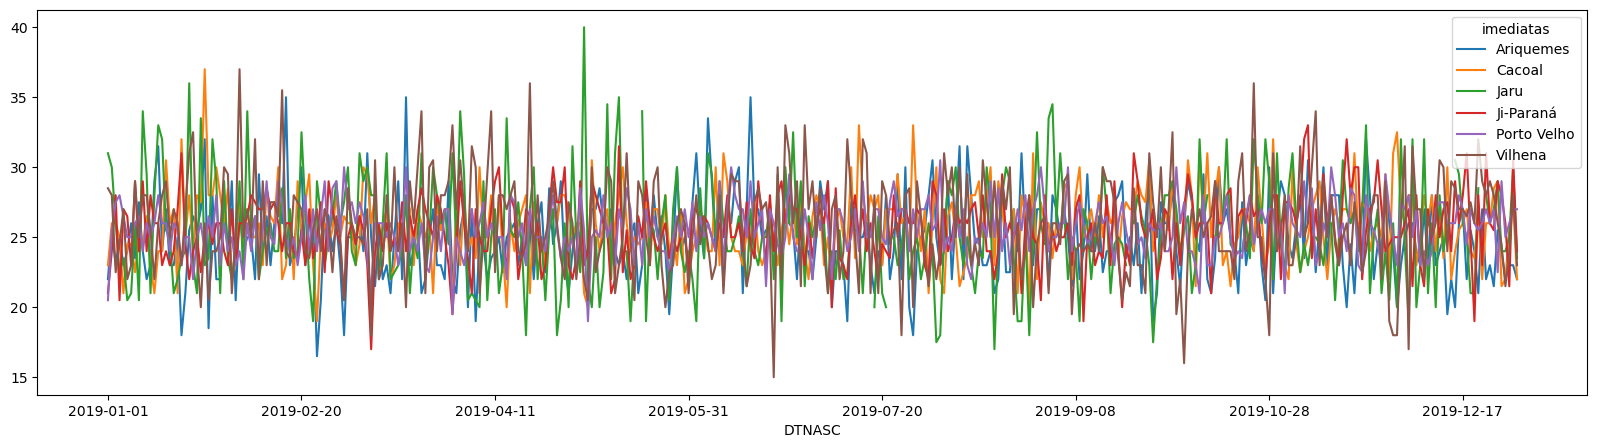

In [167]:
sinasc4.groupby(['DTNASC', 'imediatas'])['IDADEMAE'].median().unstack().plot(figsize=[20,5])

A região imediata de Jaru teve um destaque em relação a media da idade das mães entre 11/04 e 31/05 de 2019.

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [183]:
sinasc5=sinasc_raw[['munResNome','IDADEMAE','QTDFILMORT','PESO','CONSULTAS']].copy()
sinasc5.head()

,munResNome,IDADEMAE,QTDFILMORT,PESO,CONSULTAS
0,Alta Floresta D'Oeste,19,0.0,3685,4
1,Alta Floresta D'Oeste,29,0.0,3055,4
2,Alta Floresta D'Oeste,37,0.0,3460,4
3,Alto Alegre dos Parecis,30,0.0,2982,3
4,Alta Floresta D'Oeste,30,0.0,3310,4


In [184]:
IDH = {"Candeias do Jamari": "médio",
    "Guajará-Mirim": "médio",
    "Itapuã do Oeste": "médio",
    "Nova Mamoré": "baixo",
    "Porto Velho": "alto",
    "Ariquemes": "alto",
    "Alto Paraíso": "médio",
    "Buritis": "médio",
    "Cacaulândia": "médio",
    "Campo Novo de Rondônia": "baixo",
    "Cujubim": "médio",
    "Monte Negro": "médio",
    "Rio Crespo": "médio",
    "Jaru": "médio",
    "Governador Jorge Teixeira": "baixo",
    "Machadinho D'Oeste": "baixo",
    "Theobroma": "baixo",
    "Vale do Anari": "baixo",
    "Alvorada D'Oeste": "médio",
    "Costa Marques": "médio",
    "Ji-Paraná": "alto",
    "Mirante da Serra": "médio",
    "Nova União": "baixo",
    "Ouro Preto do Oeste": "médio",
    "Presidente Médici": "médio",
    "São Francisco do Guaporé": "médio",
    "São Miguel do Guaporé": "médio",
    "Seringueiras": "baixo",
    "Teixeirópolis": "médio",
    "Urupá": "médio",
    "Vale do Paraíso": "médio",
    "Cacoal": "alto",
    "Alta Floresta D'Oeste": "médio",
    "Alto Alegre dos Parecis": "baixo",
    "Castanheiras": "médio",
    "Espigão D'Oeste": "médio",
    "Ministro Andreazza": "médio",
    "Nova Brasilândia D'Oeste": "médio",
    "Novo Horizonte do Oeste": "médio",
    "Parecis": "médio",
    "Pimenta Bueno": "alto",
    "Primavera de Rondônia": "médio",
    "Rolim de Moura": "alto",
    "Santa Luzia D'Oeste": "médio",
    "São Felipe D'Oeste": "médio",
    "Vilhena": "alto",
    "Cabixi": "médio",
    "Cerejeiras": "médio",
    "Chupinguaia": "médio",
    "Colorado do Oeste": "médio",
    "Corumbiara": "médio",
    "Pimenteiras do Oeste": "médio"
    
}

In [185]:
sinasc5 = sinasc5.set_index('munResNome')

In [186]:
sinasc5.groupby(IDH)['PESO','CONSULTAS'].mean()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_36912\3448530210.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc5.groupby(IDH)['PESO','CONSULTAS'].mean()


,PESO,CONSULTAS
munResNome,,
alto,3245.623791,3.526372
baixo,3231.456188,3.641292
médio,3240.847592,3.663551


observa-se que o idh não afeta diretamente o peso médio e quantidade média de consultas nesse estado no ano de 2019.

In [189]:
sinasc5.groupby(IDH)['PESO','CONSULTAS'].count()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_36912\634934421.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc5.groupby(IDH)['PESO','CONSULTAS'].count()


,PESO,CONSULTAS
munResNome,,
alto,16855,16855
baixo,1826,1826
médio,8346,8346


Observa-se que a  maioria dos nascimentos estão concentrados em municipios em que o idh é alto. Também podemos perceber
que a quantidade de nascimentos está diretamente relacionado com o idh do município.

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [193]:
sinasc6=sinasc_raw[['munResNome','IDADEMAE','QTDFILMORT','PESO','CONSULTAS']].copy()
sinasc6.head()

,munResNome,IDADEMAE,QTDFILMORT,PESO,CONSULTAS
0,Alta Floresta D'Oeste,19,0.0,3685,4
1,Alta Floresta D'Oeste,29,0.0,3055,4
2,Alta Floresta D'Oeste,37,0.0,3460,4
3,Alto Alegre dos Parecis,30,0.0,2982,3
4,Alta Floresta D'Oeste,30,0.0,3310,4


In [191]:
IFDM = {"Ariquemes":"moderado",
"Vilhena":"moderado",
"Pimenta Bueno":"moderado",
"Porto Velho":"moderado",
"Ji-Paraná":"moderado",
"Cacoal":"moderado",
"Santa Luzia D'Oeste":"moderado",
"Rolim de Moura":"moderado",
"Chupinguaia":"moderado",
"São Miguel do Guaporé":"moderado",
"Pimenteiras do Oeste":"moderado",
"Teixeirópolis":"moderado",
"Colorado do Oeste":"moderado",
"Jaru":"moderado",
"Rio Crespo":"moderado",
"Primavera de Rondônia":"moderado",
"Alta Floresta D'Oeste":"moderado",
"Ouro Preto do Oeste":"moderado",
"São Francisco do Guaporé":"moderado",
"Candeias do Jamari":"moderado",
"Buritis":"moderado",
"São Felipe D'Oeste":"moderado",
"Presidente Médici":"moderado",
"Cerejeiras":"moderado",
"Monte Negro":"moderado",
"Urupá":"moderado",
"Espigão d'Oeste":"regular",
"Seringueiras":"regular",
"Alvorada D'Oeste":"regular",
"Itapuã do Oeste":"regular",
"Cabixi":"regular",
"Novo Horizonte do Oeste":"regular",
"Nova Brasilândia d'Oeste":"regular",
"Vale do Paraíso":"regular",
"Corumbiara":"regular",
"Alto Paraíso":"regular",
"Cacaulândia":"regular",
"Vale do Anari":"regular",
"Ministro Andreazza":"regular",
"Costa Marques":"regular",
"Nova União":"regular",
"Guajará-Mirim":"regular",
"Mirante da Serra":"regular",
"Parecis":"regular",
"Castanheiras":"regular",
"Theobroma":"regular",
"Machadinho D'Oeste":"regular",
"Campo Novo de Rondônia":"regular",
"Nova Mamoré":"regular",
"Cujubim":"regular",
"Alto Alegre dos Parecis":"regular",
"Governador Jorge Teixeira":"regular"}


In [195]:
sinasc6 = sinasc6.set_index('munResNome')

In [198]:
sinasc6.groupby(IFDM)['PESO','CONSULTAS','QTDFILMORT'].count()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_36912\1148985836.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc6.groupby(IFDM)['PESO','CONSULTAS','QTDFILMORT'].count()


,PESO,CONSULTAS,QTDFILMORT
munResNome,,,
moderado,21946,21946,20057
regular,4370,4370,4170


In [200]:
21946/(21946+4370)

0.8339413284693723

In [ ]:
83% dos nascidos estão concentrados em regiões em que o IFDM é moderado.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [209]:
sinasc7=sinasc_raw[['munResNome','IDADEMAE','QTDFILMORT','PESO','CONSULTAS']].copy()
sinasc7.head()

,munResNome,IDADEMAE,QTDFILMORT,PESO,CONSULTAS
0,Alta Floresta D'Oeste,19,0.0,3685,4
1,Alta Floresta D'Oeste,29,0.0,3055,4
2,Alta Floresta D'Oeste,37,0.0,3460,4
3,Alto Alegre dos Parecis,30,0.0,2982,3
4,Alta Floresta D'Oeste,30,0.0,3310,4


In [210]:
PIB = {"Porto Velho":"Acima de 1 Bi",
"Ji-Paraná":"Acima de 1 Bi",
"Vilhena":"Acima de 1 Bi",
"Ariquemes":"Acima de 1 Bi",
"Cacoal":"Acima de 1 Bi",
"Jaru":"Acima de 1 Bi",
"Rolim de Moura":"Acima de 1 Bi",
"Pimenta Bueno":"Acima de 1 Bi",
"Guajará-Mirim":"Entre 1 Bi e 500 mi",
"Ouro Preto do Oeste":"Entre 1 Bi e 500 mi",
"Buritis":"Entre 1 Bi e 500 mi",
"Machadinho D'Oeste":"Entre 1 Bi e 500 mi",
"Espigão D'Oeste":"Entre 1 Bi e 500 mi",
"São Miguel do Guaporé":"Entre 1 Bi e 500 mi",
"Candeias do Jamari":"Entre 1 Bi e 500 mi",
"Nova Mamoré":"Entre 1 Bi e 500 mi",
"Cerejeiras":"Entre 1 Bi e 500 mi",
"Alta Floresta D'Oeste":"Entre 300 mi e 500 mi",
"Presidente Médici":"Entre 300 mi e 500 mi",
"Cujubim":"Entre 300 mi e 500 mi",
"Nova Brasilândia do Oeste":"Entre 300 mi e 500 mi",
"Alto Paraíso":"Entre 300 mi e 500 mi",
"São Francisco do Guaporé":"Entre 300 mi e 500 mi",
"Colorado do Oeste":"Entre 300 mi e 500 mi",
"Monte Negro": "Entre 200 mi e 300 mi",
"Alto Alegre dos Parecis":"Entre 200 mi e 300 mi",
"Campo Novo de Rondônia":"Entre 200 mi e 300 mi",
"Alvorada D'Oeste":"Entre 200 mi e 300 mi",
"Chupinguaia":"Entre 100 mi e 200 mi",
"Corumbiara":"Entre 100 mi e 200 mi",
"Ministro Andreazza":"Entre 100 mi e 200 mi",
"Urupá":"Entre 100 mi e 200 mi",
"Costa Marques":"Entre 100 mi e 200 mi",
"Seringueiras":"Entre 100 mi e 200 mi",
"Mirante da Serra":"Entre 100 mi e 200 mi",
"Governador Jorge Teixeira":"Entre 100 mi e 200 mi",
"Theobroma":"Entre 100 mi e 200 mi",
"Santa Luzia D'Oeste":"Entre 100 mi e 200 mi",
"Novo Horizonte do Oeste":"Entre 100 mi e 200 mi",
"Itapuã do Oeste":"Entre 100 mi e 200 mi",
"Vale do Paraíso":"Entre 100 mi e 200 mi",
"Cacaulândia":"Entre 100 mi e 200 mi",
"Cabixi":"Entre 100 mi e 200 mi",
"Vale do Anari":"Entre 100 mi e 200 mi",
"Nova União":"Até 100 mi",
"Parecis":"Até 100 mi",
"Rio Crespo":"Até 100 mi",
"Pimenteiras do Oeste":"Até 100 mi",
"Teixeirópolis":"Até 100 mi",
"São Felipe D'Oeste":"Até 100 mi",
"Castanheiras":"Até 100 mi",
"Primavera de Rondônia":"Até 100 mi"}

In [211]:
sinasc7 = sinasc7.set_index('munResNome')

In [214]:
sinasc7.groupby(PIB)['PESO','IDADEMAE'].count()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_36912\3292258766.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc7.groupby(PIB)['PESO','IDADEMAE'].count()


,PESO,IDADEMAE
munResNome,,
Acima de 1 Bi,17736,17736
Até 100 mi,431,431
Entre 1 Bi e 500 mi,4304,4304
Entre 100 mi e 200 mi,1952,1952
Entre 200 mi e 300 mi,724,724
Entre 300 mi e 500 mi,1619,1619


In [215]:
sinasc7.groupby(PIB)['PESO','IDADEMAE'].mean()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_36912\3691821110.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc7.groupby(PIB)['PESO','IDADEMAE'].mean()


,PESO,IDADEMAE
munResNome,,
Acima de 1 Bi,3247.215719,26.265562
Até 100 mi,3186.264501,26.515081
Entre 1 Bi e 500 mi,3239.456087,25.782528
Entre 100 mi e 200 mi,3248.526639,25.662910
Entre 200 mi e 300 mi,3231.439227,25.323204
Entre 300 mi e 500 mi,3240.490426,25.770846


Observa-se que onde o pib é menor há um menor peso médio dos bebes.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.